# Chain Exercises - Interactive Practice

Welcome to the interactive chain exercises! This notebook will help you practice the key concepts from the chain lesson:

- **Messages**: Working with different message types (HumanMessage, AIMessage, etc.)
- **Chat Models**: Using LLMs with message-based conversations
- **Tools**: Creating and binding tools to chat models
- **LangGraph**: Building graphs with MessagesState and tool calling

Each exercise builds on the previous one, so complete them in order!

## Setup
Let's start by installing the required packages and setting up our environment.

In [2]:
%%capture --no-stderr
%pip install --quiet -U langchain_openai langchain_core langgraph

In [3]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")

---

## Exercise 1: Working with Messages 📝

**Goal**: Practice creating and working with different message types.

LangChain supports several message types:
- `HumanMessage`: Messages from users
- `AIMessage`: Messages from AI models
- `SystemMessage`: Instructions for the AI model
- `ToolMessage`: Results from tool calls

**Your Task**: Create a conversation between a human and AI about planning a vacation.

In [ ]:
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

# TODO: Create a conversation with the following messages:
# 1. A SystemMessage with instructions to be a helpful travel assistant
# 2. A HumanMessage asking about vacation destinations in Europe
# 3. An AIMessage suggesting 3 popular European destinations
# 4. A HumanMessage asking for more details about one of the destinations

conversation = [
    # TODO: Add your messages here
    SystemMessage(content='You are a helpful assistant'),
    HumanMessage(content='What are the best place to travel in Europe'),
    AIMessage(content='London, Pudapest and Switzerland'),
    HumanMessage(content='Can you give me more details about Switzerland')
    
]

# Display the conversation
for message in conversation:
    message.pretty_print()

**💡 Hint**: Each message type takes a `content` parameter and optionally a `name` parameter.

<details>
<summary>🔍 Click to see the solution</summary>

```python
conversation = [
    SystemMessage(content="You are a helpful travel assistant. Provide detailed and accurate information about travel destinations."),
    HumanMessage(content="I'm planning a vacation to Europe. Can you suggest some destinations?", name="Traveler"),
    AIMessage(content="Here are 3 popular European destinations: 1) Paris, France - famous for art, culture, and cuisine, 2) Barcelona, Spain - known for architecture and beaches, 3) Amsterdam, Netherlands - beautiful canals and museums.", name="Assistant"),
    HumanMessage(content="Tell me more about Barcelona. What's the best time to visit?", name="Traveler")
]
```
</details>

In [ ]:
# Verification: Check your solution
print(f"✅ Number of messages: {len(conversation)}")
print(f"✅ Message types: {[type(msg).__name__ for msg in conversation]}")

# Expected: 4 messages with types ['SystemMessage', 'HumanMessage', 'AIMessage', 'HumanMessage']

✅ Number of messages: 4
✅ Message types: ['SystemMessage', 'HumanMessage', 'AIMessage', 'HumanMessage']


---

## Exercise 2: Chat Models with Messages 🤖

**Goal**: Learn to use chat models with message-based input.

**Your Task**: Set up a chat model and use it to continue the conversation from Exercise 1.

In [ ]:
from langchain_openai import ChatOpenAI

# TODO: Initialize a ChatOpenAI model with model="gpt-4o"
llm = ChatOpenAI(model='gpt-4o')  # Replace with your code

# TODO: Use the model to respond to your conversation from Exercise 1
# Call llm.invoke() with your conversation messages
response = llm.invoke(conversation)  # Replace with your code

print("AI Response:")
response.pretty_print()

print("\nResponse metadata:")
print(f"Model: {response.response_metadata.get('model_name', 'N/A')}")
print(f"Tokens used: {response.response_metadata.get('token_usage', {}).get('total_tokens', 'N/A')}")

AI Response:
================================== Ai Message ==================================

Certainly! Switzerland is renowned for its picturesque landscapes, high-quality living, and diverse cultural experiences. Here are some highlights about Switzerland:

1. **Scenic Beauty**: 
   - **The Alps**: The Swiss Alps offer breathtaking views and numerous outdoor activities throughout the year. During winter, popular ski resorts like Zermatt and St. Moritz attract winter sports enthusiasts. In summer, activities like hiking and mountain biking are popular.
   - **Lake Geneva**: This stunning lake, shared with France, is surrounded by the city of Geneva, the Lavaux vineyard terraces, and the historic town of Montreux.
   - **Interlaken and Jungfrau Region**: Known for its adventure sports and proximity to majestic peaks like the Eiger, Mönch, and Jungfrau.

2. **Cities and Culture**:
   - **Zurich**: Switzerland's largest city is a hub for finance and culture, offering museums, galleries

<details>
<summary>🔍 Click to see the solution</summary>

```python
llm = ChatOpenAI(model="gpt-4o")
response = llm.invoke(conversation)
```
</details>

In [ ]:
# Verification: Check your solution
print(f"✅ Model initialized: {llm is not None}")
print(f"✅ Response received: {response is not None}")
print(f"✅ Response is AIMessage: {type(response).__name__ == 'AIMessage'}")

✅ Model initialized: True
✅ Response received: True
✅ Response is AIMessage: True


---

## Exercise 3: Creating and Using Tools 🔧

**Goal**: Create a custom tool and bind it to a chat model.

**Your Task**: Create a temperature conversion tool and test it with the chat model.

In [1]:
# TODO: Create a function called 'convert_temperature' that:
# - Takes parameters: temperature (float), from_unit (str), to_unit (str)
# - Converts between Celsius and Fahrenheit
# - Returns the converted temperature as a float
# - Has a proper docstring describing the function and parameters

def convert_temperature(temperature: float, from_unit: str, to_unit: str) -> float:
    """
    Convert temperature between Celsius and Fahrenheit
    """
    if from_unit.upper() == 'C' and to_unit.upper() == 'F':
        return temperature * 9/5 + 32
    elif from_unit.upper() == 'F' and to_unit.upper() == 'C':
        return (temperature - 32) * 5/9
    else:
        return temperature  # Same unit, no conversion needed

    llm_with_tools = llm.bind_tools([convert_temperature])


def multiply(a: float, b: float) -> float:
    """
    Multiply two numbers together.
    
    Args:
        a: First number to multiply
        b: Second number to multiply
    
    Returns:
        The product of a and b
    """
    return a * b


# TODO: Bind the tool to your chat model
llm_with_tools = llm.bind_tools([convert_temperature, multiply])  # Replace with your code

# Test the tool
test_message = HumanMessage(content="Convert 25 degrees Celsius to Fahrenheit")
tool_response = llm_with_tools.invoke([test_message])
tool_response.pretty_print()

NameError: name 'llm' is not defined

**💡 Hints**: 
- Celsius to Fahrenheit: `F = C * 9/5 + 32`
- Fahrenheit to Celsius: `C = (F - 32) * 5/9`
- Use `llm.bind_tools([your_function])` to bind the tool

<details>
<summary>🔍 Click to see the solution</summary>

```python
def convert_temperature(temperature: float, from_unit: str, to_unit: str) -> float:
    """Convert temperature between Celsius and Fahrenheit.
    
    Args:
        temperature: The temperature value to convert
        from_unit: Source unit ('C' for Celsius, 'F' for Fahrenheit)
        to_unit: Target unit ('C' for Celsius, 'F' for Fahrenheit)
    
    Returns:
        The converted temperature
    """
    if from_unit.upper() == 'C' and to_unit.upper() == 'F':
        return temperature * 9/5 + 32
    elif from_unit.upper() == 'F' and to_unit.upper() == 'C':
        return (temperature - 32) * 5/9
    else:
        return temperature  # Same unit, no conversion needed

llm_with_tools = llm.bind_tools([convert_temperature])
```
</details>

In [11]:
# Verification: Test your tool function directly
test_result = convert_temperature(25, 'C', 'F')
print(f"✅ Temperature conversion test: 25°C = {test_result}°F")
print(f"✅ Expected result: 77.0°F")
print(f"✅ Tool bound to model: {llm_with_tools is not None}")
print(f"✅ Model has tool calls: {hasattr(tool_response, 'tool_calls') and len(tool_response.tool_calls) > 0}")

✅ Temperature conversion test: 25°C = 77.0°F
✅ Expected result: 77.0°F
✅ Tool bound to model: True
✅ Model has tool calls: True


---

## Exercise 4: Building a Graph with MessagesState 🕸️

**Goal**: Create a LangGraph that uses MessagesState and can handle tool calls.

**Your Task**: Build a graph that can respond to messages and execute tool calls when needed.

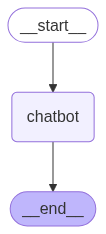

In [20]:
from langgraph.graph import MessagesState, StateGraph, START, END
from IPython.display import Image, display

# TODO: Create a node function called 'chatbot' that:
# - Takes a MessagesState as input
# - Uses llm_with_tools to generate a response
# - Returns the response wrapped in a messages list

def chatbot(state: MessagesState):
    return {'messages': [llm_with_tools.invoke(state['messages'])]}

# TODO: Build the graph:
# 1. Create a StateGraph with MessagesState
# 2. Add the chatbot node
# 3. Add edges from START to chatbot and chatbot to END
# 4. Compile the graph

class State(MessagesState):
    pass

builder = StateGraph(State)  # Replace with your code
# TODO: Add your graph building code here
builder.add_node('chatbot', chatbot)
builder.add_edge(START, 'chatbot')
builder.add_edge('chatbot', END)
graph = builder.compile()  # Replace with your compiled graph

# Display the graph structure
if graph:
    display(Image(graph.get_graph().draw_mermaid_png()))

<details>
<summary>🔍 Click to see the solution</summary>

```python
def chatbot(state: MessagesState):
    response = llm_with_tools.invoke(state["messages"])
    return {"messages": [response]}

builder = StateGraph(MessagesState)
builder.add_node("chatbot", chatbot)
builder.add_edge(START, "chatbot")
builder.add_edge("chatbot", END)
graph = builder.compile()
```
</details>

In [21]:
# Verification: Test your graph
print(f"✅ Graph created: {graph is not None}")
if graph:
    print(f"✅ Graph nodes: {list(graph.get_graph().nodes.keys())}")
    print("✅ Expected nodes: ['__start__', 'chatbot', '__end__']")

✅ Graph created: True
✅ Graph nodes: ['__start__', 'chatbot', '__end__']
✅ Expected nodes: ['__start__', 'chatbot', '__end__']


---

## Exercise 5: Testing the Complete Chain 🧪

**Goal**: Test your complete chain with different types of inputs.

**Your Task**: Test your graph with both regular conversation and tool-requiring queries.

In [22]:
# Test 1: Regular conversation
print("=== Test 1: Regular Conversation ===")
result1 = graph.invoke({"messages": [HumanMessage(content="Hello! How are you today?")]})

for msg in result1['messages']:
    msg.pretty_print()

print("\n" + "="*50 + "\n")

=== Test 1: Regular Conversation ===
================================ Human Message =================================

Hello! How are you today?
================================== Ai Message ==================================

Hello! I'm just a computer program, so I don't have feelings, but I'm here and ready to help you with whatever you need! How about you?




In [23]:
# Test 2: Tool-requiring query
print("=== Test 2: Temperature Conversion ===")
result2 = graph.invoke({"messages": [HumanMessage(content="What is 100 degrees Fahrenheit in Celsius?")]})

for msg in result2['messages']:
    msg.pretty_print()
    

print("\n" + "="*50 + "\n")

=== Test 2: Temperature Conversion ===
================================ Human Message =================================

What is 100 degrees Fahrenheit in Celsius?
================================== Ai Message ==================================
Tool Calls:
  convert_temperature (call_PXHUPiqKrYbtcPAQzv84UlKu)
 Call ID: call_PXHUPiqKrYbtcPAQzv84UlKu
  Args:
    temperature: 100
    from_unit: Fahrenheit
    to_unit: Celsius




In [26]:
# Test 3: Multi-turn conversation
print("=== Test 3: Multi-turn Conversation ===")
messages = [
    HumanMessage(content="I'm planning a trip to a cold place."),
    AIMessage(content='Where are you going?'),
    HumanMessage(content='What is 10 Celsius in F?')
]

# TODO: Use your graph to continue this conversation
result3 = graph.invoke({'messages':messages})  # Replace with your code

if result3:
    for msg in result3['messages']:
        msg.pretty_print()

=== Test 3: Multi-turn Conversation ===
================================ Human Message =================================

I'm planning a trip to a cold place.
================================== Ai Message ==================================

Where are you going?
================================ Human Message =================================

What is 10 Celsius in F?
================================== Ai Message ==================================
Tool Calls:
  convert_temperature (call_92i8VAsMtSc0nmUnDNiZ0WCo)
 Call ID: call_92i8VAsMtSc0nmUnDNiZ0WCo
  Args:
    temperature: 10
    from_unit: Celsius
    to_unit: Fahrenheit


<details>
<summary>🔍 Click to see the solution for Test 3</summary>

```python
messages = [
    HumanMessage(content="I'm planning a trip to a cold place."),
    AIMessage(content="That sounds exciting! Cold destinations can be beautiful. Are you thinking about somewhere like Alaska, Norway, or maybe Iceland?"),
    HumanMessage(content="Iceland sounds great! I heard it can be -10°C there. What is that in Fahrenheit?")
]

result3 = graph.invoke({"messages": messages})
```
</details>

In [27]:
# Final Verification: Check all tests
print("🎉 FINAL VERIFICATION 🎉")
print(f"✅ Test 1 completed: {result1 is not None and len(result1['messages']) > 0}")
print(f"✅ Test 2 completed: {result2 is not None and len(result2['messages']) > 0}")
if result2 and len(result2['messages']) > 1:
    last_msg = result2['messages'][-1]
    has_tool_call = hasattr(last_msg, 'tool_calls') and len(last_msg.tool_calls) > 0
    print(f"✅ Test 2 used tools: {has_tool_call}")
print(f"✅ Test 3 completed: {result3 is not None and len(result3['messages']) > 0 if result3 else False}")

print("\n🏆 Congratulations! You've successfully built a complete chain with:")
print("   📝 Message handling")
print("   🤖 Chat model integration")
print("   🔧 Custom tool creation")
print("   🕸️ LangGraph state management")
print("   🧪 End-to-end testing")

🎉 FINAL VERIFICATION 🎉
✅ Test 1 completed: True
✅ Test 2 completed: True
✅ Test 2 used tools: True
✅ Test 3 completed: True

🏆 Congratulations! You've successfully built a complete chain with:
   📝 Message handling
   🤖 Chat model integration
   🔧 Custom tool creation
   🕸️ LangGraph state management
   🧪 End-to-end testing


---

## 🎯 Bonus Challenges

If you want to practice more, try these bonus challenges:

### Challenge 1: Add More Tools
Create additional tools like:
- A calculator for basic math operations
- A unit converter for distances (miles to km)
- A time zone converter

### Challenge 2: Error Handling
Modify your temperature conversion tool to handle invalid inputs gracefully.

### Challenge 3: Conversation Memory
Extend your graph to remember previous conversations by maintaining message history.

### Challenge 4: Conditional Logic
Add conditional edges to your graph that route to different nodes based on the type of user request.

In [ ]:
# Space for your bonus challenges!
# TODO: Implement your bonus challenges here